### Problem definition:

Discover look alike customers

In [1]:
# Load Packages and Data
# Exploratory Data Analysis (EDA)
    #-Descriptive Statistics
    #-Univariate Analysis
    #-Bivariate Analysis
    # Missing Value Treatment


### Load Packages and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns
sns.set();

In [3]:
# Load dataset
df_data = pd.read_csv('data/red_crown_sample_data1.csv',index_col=False)

In [4]:
# shape
df_data.shape

(239788, 13)

There are 23,9788 instances to work with and the data has 13 attributes.

In [5]:
# view sample rows
df_data.head()

,Unnamed: 0,ID,age,submission_date,contract_length,upgraded,gender,category,score1,score2,score3,first_contact,customer
0,1,qzx1,41,2013-03-30,2027.0,False,Female,1,4.155778,1.303375,-0.003228,NaN,False
1,2,qzx1,42,2016-06-30,162.0,False,Female,2,3.552356,1.719870,-0.000300,NaN,False
2,3,qzx1,40,2012-04-20,381.0,False,Female,2,3.551545,2.055290,-0.000003,NaN,False
3,4,qzx1,40,2013-11-02,351.0,False,Female,2,4.202698,1.151331,-0.010516,NaN,False
4,5,qzx1,44,2010-01-20,120.0,False,Female,2,2.818966,2.169682,-0.000348,NaN,False


In [6]:
# dataset attribute stat
df_data.describe()

,Unnamed: 0,age,contract_length,category,score1,score2,score3
count,239788.000000,239788.000000,68263.000000,239788.000000,239788.000000,239788.000000,239788.000000
mean,119894.500000,34.204689,2081.781185,1.621895,4.918111,1.118694,-1.516862
std,69220.977512,2.984439,1225.355978,0.484915,0.517630,0.599922,1.025697
min,1.000000,9.000000,1.000000,1.000000,2.149353,0.361095,-10.936312
25%,59947.750000,32.000000,1059.000000,1.000000,4.678020,0.711478,-2.027088
50%,119894.500000,34.000000,2036.000000,2.000000,5.033811,0.908702,-1.397082
75%,179841.250000,36.000000,3010.000000,2.000000,5.285969,1.347086,-0.787911
max,239788.000000,45.000000,6234.000000,2.000000,6.560284,5.713280,0.000000


In [7]:
# data type
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239788 entries, 0 to 239787
Data columns (total 13 columns):
Unnamed: 0         239788 non-null int64
ID                 239788 non-null object
age                239788 non-null int64
submission_date    239664 non-null object
contract_length    68263 non-null float64
upgraded           239788 non-null bool
gender             239788 non-null object
category           239788 non-null int64
score1             239788 non-null float64
score2             239788 non-null float64
score3             239788 non-null float64
first_contact      86501 non-null object
customer           239788 non-null bool
dtypes: bool(2), float64(4), int64(3), object(4)
memory usage: 20.6+ MB


In [8]:
# Check for missing values
df_data.isnull().sum()

Unnamed: 0              0
ID                      0
age                     0
submission_date       124
contract_length    171525
upgraded                0
gender                  0
category                0
score1                  0
score2                  0
score3                  0
first_contact      153287
customer                0
dtype: int64

There are missing values in contract_length, submission_date and first_contact 

In [9]:
# customer class distribution
print(df_data.groupby('customer').size())

customer
False    211723
True      28065
dtype: int64


From the customer population size of 239,788 there are 28,065 customers and 211,723 customers that we want to extract lookalikes from.

In [10]:
df_data.ID.unique()

array(['qzx1', 'qzx2', 'qzx3', 'qzx4', 'qzx5', 'qzx6', 'qzx7', 'qzx8',
       'qzx9', 'qzx10', 'qzx11', 'qzx12', 'qzx13', 'qzx14', 'qzx15',
       'qzx16', 'qzx17', 'qzx18', 'qzx19', 'qzx20', 'qzx21', 'qzx22',
       'qzx23', 'qzx24', 'qzx25', 'qzx26', 'qzx27', 'qzx28', 'qzx29',
       'qzx30', 'qzx31', 'qzx32', 'qzx33', 'qzx34', 'qzx35', 'qzx36',
       'qzx37', 'qzx38', 'qzx39', 'qzx40', 'qzx41', 'qzx42', 'qzx43',
       'qzx44', 'qzx45', 'qzx46', 'qzx47', 'qzx48', 'qzx49', 'qzx50',
       'qzx51', 'qzx52', 'qzx53', 'qzx54', 'qzx55', 'qzx56', 'qzx57',
       'qzx58', 'qzx59', 'qzx60', 'qzx61', 'qzx62', 'qzx63', 'qzx64',
       'qzx65'], dtype=object)

The values of the 'ID' column seems to look like a categorization attribute, each value as a one to many mapping to a number of records.

In [11]:
df_data.isna().sum()

Unnamed: 0              0
ID                      0
age                     0
submission_date       124
contract_length    171525
upgraded                0
gender                  0
category                0
score1                  0
score2                  0
score3                  0
first_contact      153287
customer                0
dtype: int64

In [12]:
df_data.head()

,Unnamed: 0,ID,age,submission_date,contract_length,upgraded,gender,category,score1,score2,score3,first_contact,customer
0,1,qzx1,41,2013-03-30,2027.0,False,Female,1,4.155778,1.303375,-0.003228,NaN,False
1,2,qzx1,42,2016-06-30,162.0,False,Female,2,3.552356,1.719870,-0.000300,NaN,False
2,3,qzx1,40,2012-04-20,381.0,False,Female,2,3.551545,2.055290,-0.000003,NaN,False
3,4,qzx1,40,2013-11-02,351.0,False,Female,2,4.202698,1.151331,-0.010516,NaN,False
4,5,qzx1,44,2010-01-20,120.0,False,Female,2,2.818966,2.169682,-0.000348,NaN,False


Not sure what to do with the submission_date yet, there are no missing submission_date values in customer records and we 
only have them in non-customer records, the count of missing submission_date values is abt 124, this will be removed 
and be revisited subsequently. Same goes for first_contact date attribute to some extent. I dont want to throw away the rows of data involved.

In [13]:
df_data = df_data.drop(columns=['submission_date','first_contact','contract_length'])
df_data.head()

,Unnamed: 0,ID,age,upgraded,gender,category,score1,score2,score3,customer
0,1,qzx1,41,False,Female,1,4.155778,1.303375,-0.003228,False
1,2,qzx1,42,False,Female,2,3.552356,1.719870,-0.000300,False
2,3,qzx1,40,False,Female,2,3.551545,2.055290,-0.000003,False
3,4,qzx1,40,False,Female,2,4.202698,1.151331,-0.010516,False
4,5,qzx1,44,False,Female,2,2.818966,2.169682,-0.000348,False


In [14]:
# convert bool attributes upgraded
df_data['upgraded'] = df_data.upgraded.apply(lambda x: str(x))
df_data['upgraded'] = df_data.upgraded.apply(lambda x: x.replace('False','0'))
df_data['upgraded'] = df_data.upgraded.apply(lambda x: x.replace('True','1'))
df_data.upgraded.unique()

array(['0', '1'], dtype=object)

In [15]:
# convert upgraded data fron object to number
df_data['upgraded'] = df_data.upgraded.apply(lambda x: int(x))

In [16]:
# convert categorical attributes gender
df_data['gender'] = df_data.gender.apply(lambda x: x.replace("Male","0"))
df_data['gender'] = df_data.gender.apply(lambda x: x.replace("Female","1"))
df_data.gender.unique()

array(['1', '0'], dtype=object)

In [17]:
# convert gender data fron object to number
df_data['gender'] = df_data.gender.apply(lambda x: int(x))

In [18]:
df_data.head()

,Unnamed: 0,ID,age,upgraded,gender,category,score1,score2,score3,customer
0,1,qzx1,41,0,1,1,4.155778,1.303375,-0.003228,False
1,2,qzx1,42,0,1,2,3.552356,1.719870,-0.000300,False
2,3,qzx1,40,0,1,2,3.551545,2.055290,-0.000003,False
3,4,qzx1,40,0,1,2,4.202698,1.151331,-0.010516,False
4,5,qzx1,44,0,1,2,2.818966,2.169682,-0.000348,False


In [19]:
# convert bool attributes customer
df_data['customer'] = df_data.customer.apply(lambda x: str(x))
df_data['customer'] = df_data.customer.apply(lambda x: x.replace('False','0'))
df_data['customer'] = df_data.customer.apply(lambda x: x.replace('True','1'))
df_data.customer.unique()

array(['0', '1'], dtype=object)

In [20]:
# convert customer data fron object to number
df_data['customer'] = df_data.customer.apply(lambda x: int(x))

In [21]:
# select only numeric attributes
numeric_features = df_data[['age','upgraded','gender','category','score1','score2','score3','customer']]


In [22]:
numeric_features.head()

,age,upgraded,gender,category,score1,score2,score3,customer
0,41,0,1,1,4.155778,1.303375,-0.003228,0
1,42,0,1,2,3.552356,1.719870,-0.000300,0
2,40,0,1,2,3.551545,2.055290,-0.000003,0
3,40,0,1,2,4.202698,1.151331,-0.010516,0
4,44,0,1,2,2.818966,2.169682,-0.000348,0


In [23]:
# attribute correlation
corr = numeric_features.corr()
print (corr['customer'].sort_values(ascending=False), '\n')

customer    1.000000
upgraded    0.266606
age         0.126768
score2      0.057003
category    0.012293
gender      0.007692
score3     -0.019022
score1     -0.104302
Name: customer, dtype: float64 



#### Training and Validation dataset

In [24]:
# create the train dataset of known customers
df_customers = df_data[df_data['customer']==1]

In [25]:
# create the test dataset of potential customers
df_non_customers = df_data[df_data['customer']==0]

In [26]:
# Store the identifier
df_non_customers_ID = df_non_customers['ID']
df_customers_ID = df_customers['ID']

In [27]:
# Drop the Id and customer values from the dataset
#df_non_customers = df_non_customers.drop(['ID','customer','age','contract_length','score3'],axis=1)
#df_customers = df_customers.drop(['ID','customer','age','contract_length','score3'],axis=1) 

In [28]:
# Drop the Id and customer values from the dataset
df_non_customers = df_non_customers.drop(['ID','customer'],axis=1)
df_customers = df_customers.drop(['ID','customer'],axis=1) 

In [29]:
## Convert dataframe into list and then into a numpy array
train = df_customers.values.tolist() 
train = np.array(train)

In [30]:
## Convert dataframe into list and then into a numpy array
test = df_non_customers.values.tolist() 
test = np.array(test)

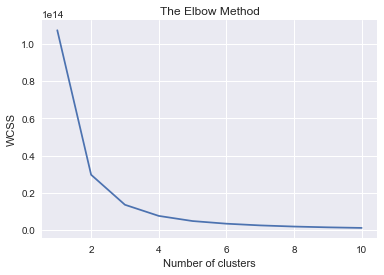

In [31]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
pred = kmeans.fit_predict(train)


In [35]:
len(pred)

28065

In [36]:
# Fitting K-Means to the dataset
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
#kmeans.fit(train)
#pred = kmeans.predict(test)

In [37]:
# Fitting K-Means to the test dataset
from sklearn.cluster import KMeans
kmeans_test = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans_test.fit(train)
pred_test = kmeans_test.predict(test)

In [55]:
kmeans.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [39]:
kmeans_test.labels_

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [42]:
len(pred)

28065

In [43]:
len(pred_test)

211723

In [44]:
df_customers['pred_cluster'] = pred

In [45]:
df_non_customers['pred_cluster'] = pred_test

In [50]:
df_customers.head()

,Unnamed: 0,age,upgraded,gender,category,score1,score2,score3,pred_cluster
687,688,42,1,1,1,4.072271,1.302668,-0.254783,2
688,689,41,1,1,1,4.265342,1.159582,-0.268129,2
689,690,42,1,1,1,4.075194,1.307954,-0.246189,2
690,691,43,1,1,1,2.272706,3.243990,-0.001572,2
691,692,40,1,1,1,4.342194,1.217905,-0.173912,2


In [49]:
df_non_customers.head()

,Unnamed: 0,age,upgraded,gender,category,score1,score2,score3,pred_cluster
0,1,41,0,1,1,4.155778,1.303375,-0.003228,2
1,2,42,0,1,2,3.552356,1.719870,-0.000300,2
2,3,40,0,1,2,3.551545,2.055290,-0.000003,2
3,4,40,0,1,2,4.202698,1.151331,-0.010516,2
4,5,44,0,1,2,2.818966,2.169682,-0.000348,2


In [ ]:
df_customers.to_csv('non_customers',index=False)

In [51]:
df_customers.pred_cluster.unique()

array([2, 1, 0])

In [52]:
# customer class distribution
print(df_customers.groupby('pred_cluster').size())

pred_cluster
0     7430
1    10181
2    10454
dtype: int64


In [53]:
# customer class distribution
print(df_non_customers.groupby('pred_cluster').size())

pred_cluster
0    78827
1    62841
2    70055
dtype: int64


In [56]:
kmeans_test.cluster_centers_[:, 0]

array([ 190134.88923284,  116928.23926923,   44090.25903961])

In [57]:
kmeans_test.cluster_centers_[:, 1]

array([ 32.57335128,  35.01601022,  37.36368854])